In [ ]:
!pip install transformers
!git clone https://github.com/gguiomar/cog-schema.git

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir(os.getcwd()+'/cog-schema')

In [2]:
from tasks.VSTtask import VSTtask
from agents.LLMagent import LLMagent
from manager.TaskManager import TaskManager

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [3]:
model_name = "marcelbinz/Llama-3.1-Centaur-8B-adapter"
pipe = LLMagent(
    model_name=model_name, 
    device_map="cuda:0", 
    max_seq_length=32768, 
    load_in_4bit=True, 
    use_unsloth=True
)

Using unsloth with GPU
==((====))==  Unsloth 2025.1.6: Fast Llama patching. Transformers: 4.48.1.
   \\   /|    GPU: NVIDIA GeForce RTX 4090. Max memory: 23.643 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth 2025.1.6 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.
Device set to use cuda:0
The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DiffLlamaForCausalLM', 'ElectraForCausalLM', 'Emu3ForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FalconMambaForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'GitForCausalLM', 'GlmForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapane

In [6]:
manager = TaskManager(n_simulations=1, n_rounds=10, num_quadrants=2, num_queues=1, pipe=pipe, verbose=False)
metrics = manager.run_simulations()

100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


In [7]:
metrics

{'n_rounds': 10,
 'n_queues': 1,
 'n_simulations': 1,
 'success_rate': 0.0,
 'quadrant_distribution': {'quadrant_1': {'times_chosen': 0,
   'times_correct': 1},
  'quadrant_2': {'times_chosen': 1, 'times_correct': 0}},
 'timestamp': '20250128_123834'}

In [ ]:
metrics_l = []
for nrounds in np.arange(5,30,1):
    manager = TaskManager(n_simulations=10, n_rounds=nrounds, num_quadrants=2, num_queues=1, pipe=pipe, verbose=False)
    metrics_l.append(manager.run_simulations())

 10%|█         | 1/10 [00:00<00:08,  1.03it/s]

In [5]:
metrics_l[0]

{'n_rounds': 5,
 'n_queues': 1,
 'n_simulations': 30,
 'success_rate': 0.5,
 'quadrant_distribution': {'quadrant_1': {'times_chosen': 17,
   'times_correct': 10},
  'quadrant_2': {'times_chosen': 13, 'times_correct': 20}},
 'timestamp': '20250128_124425'}

In [8]:
def plot_success_rate_per_round(data):
    """
    Plot the success rate over simulation rounds.
    """
    # Extract n_rounds (round indices) and success rates
    n_rounds = [entry['n_rounds'] for entry in data]  # Simulate round numbers starting from 1
    success_rates = [entry['success_rate'] for entry in data]

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(n_rounds, success_rates, marker='o', color='b', label="Success Rate")
    plt.xlabel("Round Number")
    plt.ylabel("Success Rate")
    plt.title("Success Rate Over Simulation Rounds")
    plt.xticks(n_rounds)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

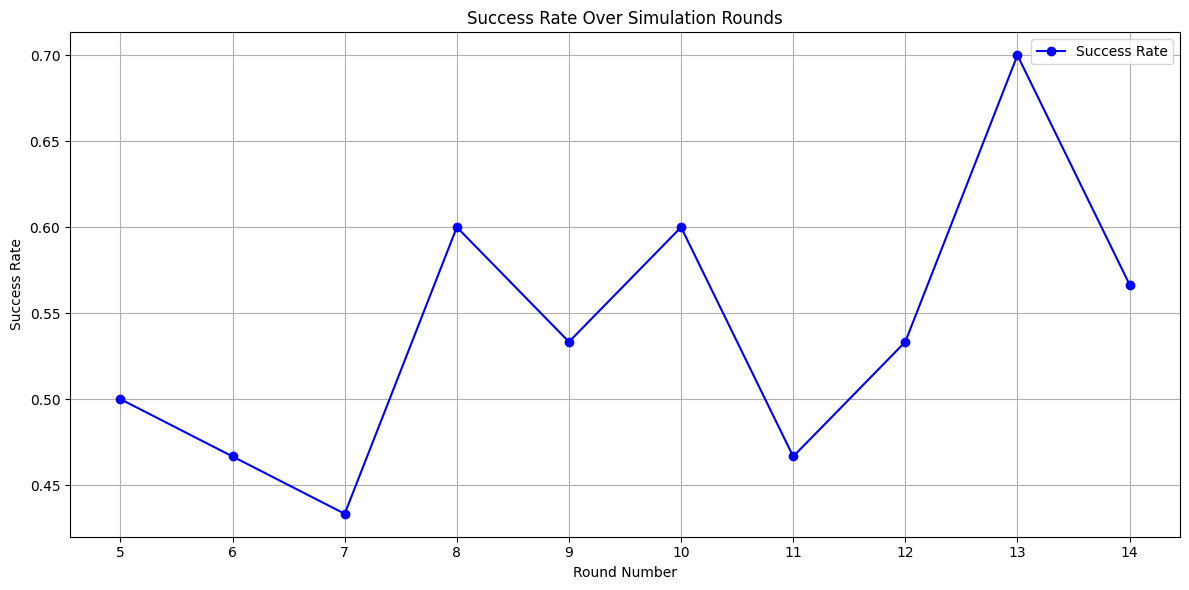

In [7]:
plot_success_rate_per_round(metrics_l)